In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Extra Credit

> If you know how to estimate simple regressions, this one's for you! On *bcourses* you'll find two files, `happydata.txt` and `codebook.txt`. The former contains variables called `HAPPY`, `REALINC`, and `REGION`.  Download these.

---

# Part 1: Exploratory Data Analysis

First let's read in the data:

In [2]:
happy_data = pd.read_csv("data/happydata.csv")
happy_data.head()

,CASEID,YEAR,REGION,HAPPY,REALINC
0,1,1972,3,3,18951
1,2,1972,3,3,24366
2,3,1972,3,2,24366
3,4,1972,3,3,30458
4,5,1972,3,2,50763


We can get some quick summary statistics:

In [3]:
happy_data.describe()

,CASEID,YEAR,REGION,HAPPY,REALINC
count,55087.000000,55087.000000,55087.000000,55087.000000,55087.000000
mean,27544.000000,1991.370596,4.885508,1.708969,28183.557082
std,15902.391476,11.299333,2.449271,0.969792,28644.955126
min,1.000000,1972.000000,1.000000,0.000000,0.000000
25%,13772.500000,1982.000000,3.000000,1.000000,8595.000000
50%,27544.000000,1991.000000,5.000000,2.000000,21068.000000
75%,41315.500000,2002.000000,7.000000,2.000000,36575.000000
max,55087.000000,2010.000000,9.000000,9.000000,162607.000000


As per directions, we'll drop responses for `HAPPY` and `REALINC` that should not factor into our analysis:

In [4]:
happy_data = happy_data[happy_data["HAPPY"] != 8] # Don't know
happy_data = happy_data[happy_data["HAPPY"] != 9] # No answer
happy_data = happy_data[happy_data["HAPPY"] != 0] # Not applicable
happy_data = happy_data[happy_data["REALINC"] != 0] # REALINC not reported

happy_data.describe()

,CASEID,YEAR,REGION,HAPPY,REALINC
count,45368.000000,45368.000000,45368.000000,45368.000000,45368.000000
mean,25676.575802,1990.045473,4.908901,1.808764,31018.408151
std,15614.539155,11.112167,2.458869,0.633396,27811.730031
min,1.000000,1972.000000,1.000000,1.000000,259.000000
25%,12308.750000,1982.000000,3.000000,1.000000,12303.000000
50%,24870.500000,1989.000000,5.000000,2.000000,24098.000000
75%,37685.250000,1998.000000,7.000000,2.000000,38449.000000
max,55087.000000,2010.000000,9.000000,3.000000,162607.000000


## Visualizing the Data

Before we perform our regressions, let's first do some exploratory data analysis to see what we're working with:

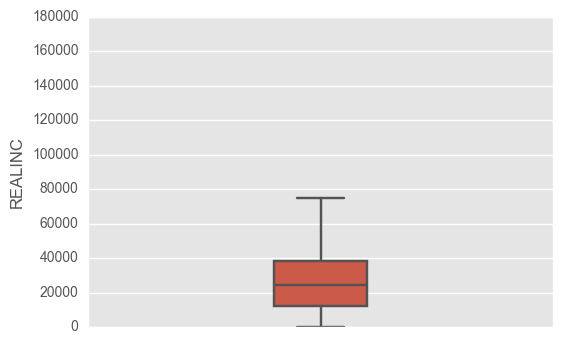

In [5]:
sns.boxplot(happy_data['REALINC'], orient='v', width=.2, fliersize=0)

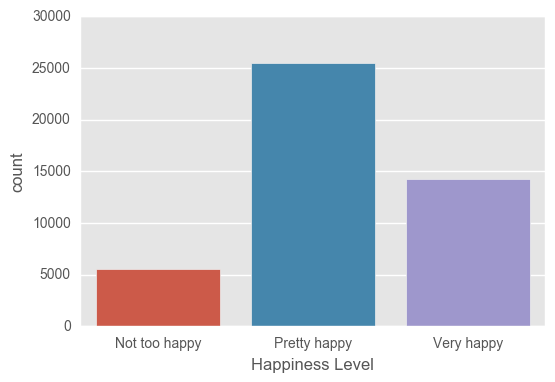

In [6]:
happy = {1: "Very happy",
         2: "Pretty happy",
         3: "Not too happy"}

sns.countplot(x='HAPPY', data=happy_data.replace({'HAPPY': happy}))
plt.xlabel('Happiness Level')

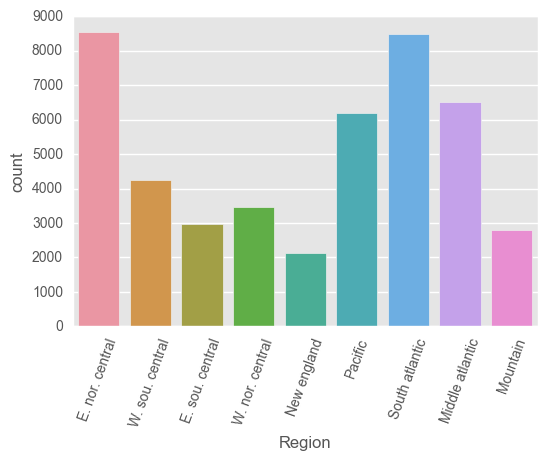

In [7]:
regions = {1: "New england",
           2: "Middle atlantic",
           3: "E. nor. central",
           4: "W. nor. central",
           5: "South atlantic",
           6: "E. sou. central",
           7: "W. sou. central",
           8: "Mountain",
           9: "Pacific"}

sns.countplot(x='REGION', data=happy_data.replace({'REGION': regions}))
plt.xticks(rotation=70)
plt.xlabel('Region')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

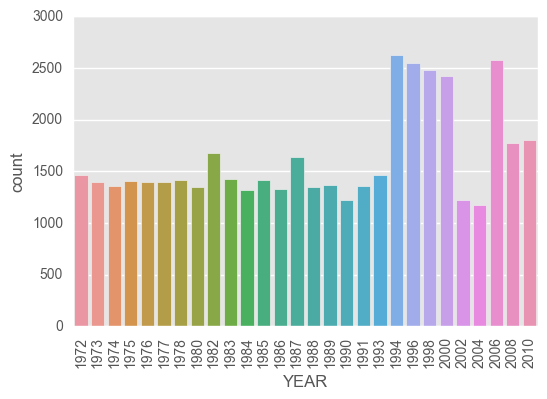

In [8]:
sns.countplot(x='YEAR', data=happy_data)
plt.xticks(rotation=90)

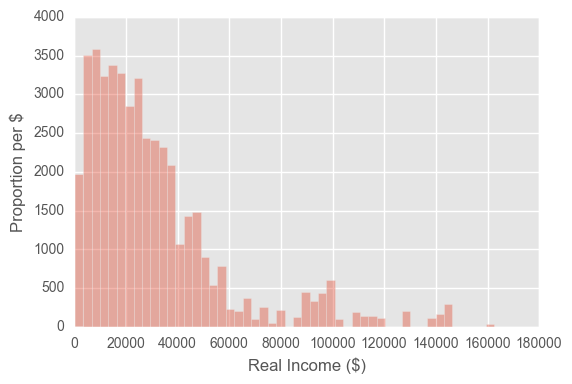

In [9]:
sns.distplot(happy_data['REALINC'], kde=False)
plt.xlabel('Real Income ($)')
plt.ylabel('Proportion per $')

Let's make a dictionary mapping each reported income to its frequency in the data.

In [10]:
income_counts = dict(happy_data["REALINC"].value_counts())

In [11]:
print("The highest reported income:", max(income_counts), "appears", income_counts[max(income_counts)],"times") 
print("The lowest reported income:", min(income_counts), "appears", income_counts[min(income_counts)] ,"times")

The highest reported income: 162607 appears 38 times
The lowest reported income: 259 appears 43 times


Let's make some scatter plots:

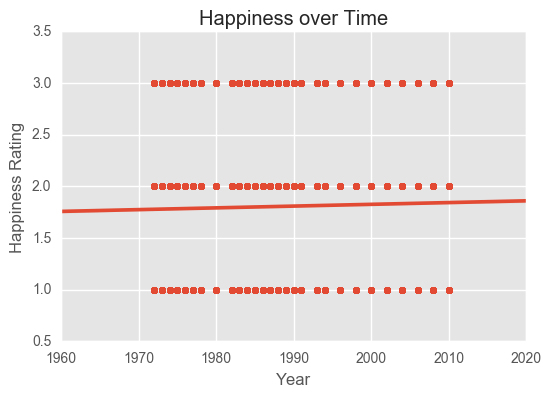

In [12]:
sns.regplot(happy_data["YEAR"], happy_data["HAPPY"])
plt.title("Happiness over Time")
plt.xlabel("Year")
plt.ylabel("Happiness Rating")

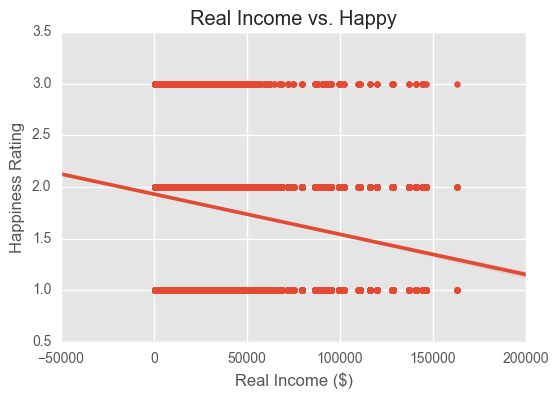

In [13]:
sns.regplot(happy_data["REALINC"], happy_data["HAPPY"])
plt.title("Real Income vs. Happy")
plt.xlabel("Real Income ($)")
plt.ylabel("Happiness Rating")

While it is always good to get a sense of how the data is distributed visually, we cannot gain much insight right away, until we perform the regressions. 

# Part 2: Mean Values

> Estimate the mean values of `HAPPY` and `REALINC` by region.  Discuss. (Note: you will want to ignore any values for these variables which indicate different missing codes; see the codebook).

In [14]:
happy_reg_mean = []
inc_reg_mean = []
regions_mean = []

for i in range(min(happy_data['REGION']), max(happy_data['REGION'] + 1)):
    print(regions[i])
    means = happy_data[happy_data['REGION'] == i][['HAPPY', 'REALINC']].mean()
    print("Mean HAPPY: " + str(means[0]))
    print("Mean REALINC: " + str(means[1]))
    print()
    happy_reg_mean.append(means[0])
    inc_reg_mean.append(means[1])
    regions_mean.append(regions[i])

New england
Mean HAPPY: 1.77928772259
Mean REALINC: 38454.3781631

Middle atlantic
Mean HAPPY: 1.8553256705
Mean REALINC: 34255.0364751

E. nor. central
Mean HAPPY: 1.81658878505
Mean REALINC: 31121.1473131

W. nor. central
Mean HAPPY: 1.76861167002
Mean REALINC: 28693.686979

South atlantic
Mean HAPPY: 1.79691183404
Mean REALINC: 29673.6814003

E. sou. central
Mean HAPPY: 1.77860276747
Mean REALINC: 23758.5325683

W. sou. central
Mean HAPPY: 1.8026842477
Mean REALINC: 27449.6357429

Mountain
Mean HAPPY: 1.7963362069
Mean REALINC: 29638.9604885

Pacific
Mean HAPPY: 1.82202842377
Mean REALINC: 34593.5906008



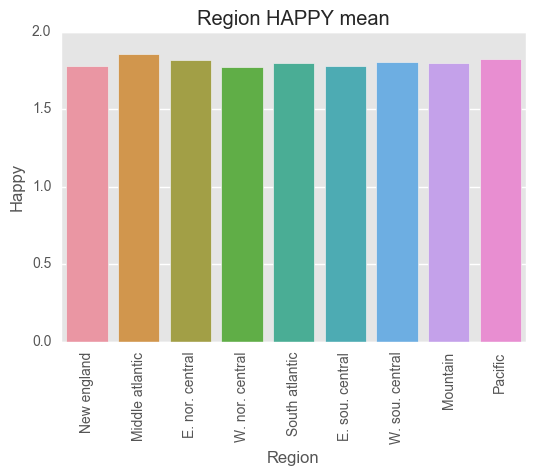

In [15]:
g = sns.barplot(x=regions_mean, y=happy_reg_mean)
g.set_xticklabels(labels=regions_mean, rotation=90)
plt.title("Region HAPPY mean")
plt.xlabel("Region")
plt.ylabel("Happy")

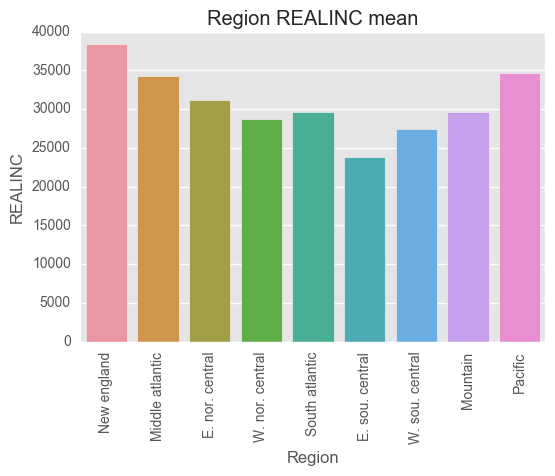

In [16]:
g = sns.barplot(x=regions_mean, y=inc_reg_mean)
g.set_xticklabels(labels=regions_mean, rotation=90)
plt.title("Region REALINC mean")
plt.xlabel("Region")
plt.ylabel("REALINC")

# Part 3: Regression

> Consider a simple regression of the form 

> $\mbox{VHAPPY}_i= \alpha + \beta\log(\mbox{REALINC}) + \epsilon_i$


> where the subscripts $i$ indicate the value of the variable for the $i$th observation, and $\mbox{VHAPPY}_i$ takes the value 1 if the respondent is "Very happy", and zero otherwise. Estimate the regression.  How would you interpret your estimates of the coefficients?

Before we estimate the regression we will change the remaining `HAPPY` values that aren't "very happy" to 0:

In [17]:
happy_data.loc[happy_data["HAPPY"] > 1, 'HAPPY'] = 0
happy_data.describe()

,CASEID,YEAR,REGION,HAPPY,REALINC
count,45368.000000,45368.000000,45368.000000,45368.000000,45368.000000
mean,25676.575802,1990.045473,4.908901,0.314495,31018.408151
std,15614.539155,11.112167,2.458869,0.464319,27811.730031
min,1.000000,1972.000000,1.000000,0.000000,259.000000
25%,12308.750000,1982.000000,3.000000,0.000000,12303.000000
50%,24870.500000,1989.000000,5.000000,0.000000,24098.000000
75%,37685.250000,1998.000000,7.000000,1.000000,38449.000000
max,55087.000000,2010.000000,9.000000,1.000000,162607.000000


We can also get the counts for `HAPPY` being 0 or 1:

In [18]:
happy_data["HAPPY"].value_counts()

0    31100
1    14268
Name: HAPPY, dtype: int64

Now we can estimate: 

$\mbox{VHAPPY}_i= \alpha + \beta\log(\mbox{REALINC}) + \epsilon_i$

In [19]:
mod = smf.ols(formula='HAPPY ~ np.log(REALINC)', data=happy_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  HAPPY   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     903.5
Date:                Mon, 25 Sep 2017   Prob (F-statistic):          1.46e-196
Time:                        02:38:00   Log-Likelihood:                -29121.
No. Observations:               45368   AIC:                         5.825e+04
Df Residuals:                   45366   BIC:                         5.826e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.3366      0.022    -

In our basic regression, our regressor and equation are statistically significant (p-value of 0.00), leading to a conclusion of a positive influence of `REALINC` on `HAPPY`, although our R-squared is extremely low, at 0.020 (that may require some further model testing). Since, the $\beta$ is .0655 and `REALINC` is log-transformed, a 1% increase in `REALINC` predicts approximately a .000655 increase in the `VHAPPY` value, ceteris paribus.

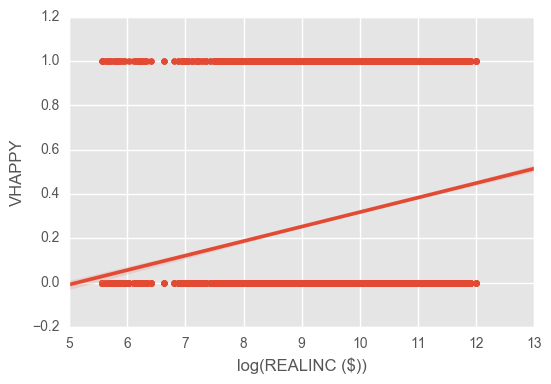

In [20]:
sns.regplot(np.log(happy_data["REALINC"]), happy_data["HAPPY"])
plt.xlabel('log(REALINC ($))')
plt.ylabel('VHAPPY')

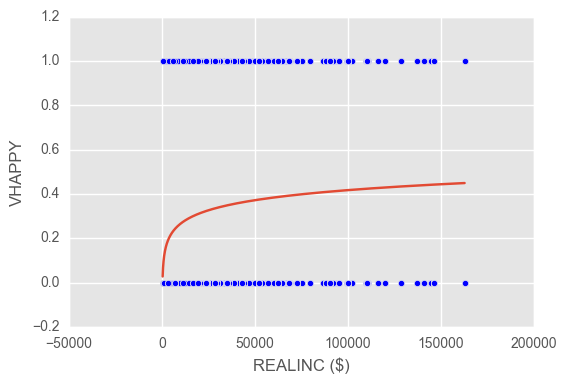

In [21]:
alpha = -0.3366
beta = 0.0655

logInc = np.log(happy_data['REALINC'])
xStart, xEnd = min(logInc), max(logInc)
xs = np.linspace(xStart, xEnd, 300)
ys = alpha + beta * xs

plt.plot(np.exp(xs), ys)
plt.scatter(happy_data['REALINC'], happy_data['HAPPY'])
plt.xlabel('REALINC ($)')
plt.ylabel('VHAPPY')

Now, let's add in the `REGION` dummies:

In [22]:
happy_data["REGION"] = happy_data["REGION"].map(regions)  # map regions
mod = smf.ols(formula='HAPPY ~ np.log(REALINC) + C(REGION)', data=happy_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  HAPPY   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     112.4
Date:                Mon, 25 Sep 2017   Prob (F-statistic):          1.56e-209
Time:                        02:38:06   Log-Likelihood:                -29068.
No. Observations:               45368   AIC:                         5.816e+04
Df Residuals:                   45358   BIC:                         5.824e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Here we see that certain regional dummy variable are significant in different directions. The coefficient for the Middle Atlantic is negative, while the coefficients for the South Atlantic, T.W. South Central, and T.E South Central are positive, all with high significance (p-values of less than .05).

Our R-squared is still low at .022, but the adjusted R-squared has increased since our previous regression, suggesting that including the new set of dummy regressors helps explain more of the variation in the data.